In [1]:
import pandas as pd
import spacy
import numpy as np

from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')

In [2]:
df_train = pd.read_csv('./datasets/train_data.csv') # Pre-Processed
df_test = pd.read_csv('./datasets/test_data.csv')

In [3]:
X_train = df_train[['Author', 'Statement']]
y_train = df_train['Label']

X_test = df_test[['Author', 'Statement']]
y_test = df_test['Label']

In [4]:
def preprocess(text):
    doc = nlp(text)
    stems = [token.lemma_ for token in doc if not token.is_stop]
    space = " "
    return space.join(stems)

In [5]:
def plot_confusion_matrix(confusion_matrix):
    plt.clf()
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
    plt.show()

In [6]:
def predict_model(classifier, nr):
    model = Pipeline([
        ('features', FeatureUnion(
            transformer_list=[
                ('author', Pipeline([
                    ('selector', FunctionTransformer(lambda x: x['Author'], validate=False)),
                    ('tfidf', TfidfVectorizer())
                ])),
                ('stmt', Pipeline([
                    ('selector', FunctionTransformer(lambda x: x['Statement'], validate=False)),
                    ('tfidf', TfidfVectorizer(ngram_range=nr))
                ]))
            ],
            transformer_weights={
                'author': 1.0,
                'stmt': 1.0
            }
        )),
        ('classifier', classifier)
    ])
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    confusion_matrix = metrics.confusion_matrix(y_test,predictions)
    accuracy = metrics.accuracy_score(y_test,predictions)
    recall = metrics.recall_score(y_test,predictions)
    precision = metrics.precision_score(y_test,predictions)
    f_score = metrics.f1_score(y_test,predictions)
    
    plot_confusion_matrix(confusion_matrix)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    print("Recall: {:.2f}%".format(recall*100))
    print("Precision: {:.2f}%".format(precision*100))
    print("F1 Score: {:.2f}%".format(f_score*100))

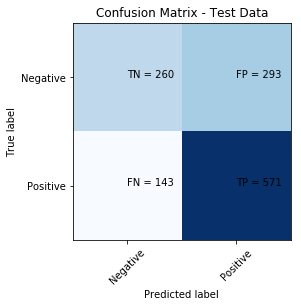

Accuracy: 65.59%
Recall: 79.97%
Precision: 66.09%
F1 Score: 72.37%


In [7]:
predict_model(LogisticRegression(solver='lbfgs'), (1,2))

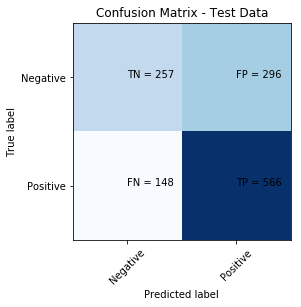

Accuracy: 64.96%
Recall: 79.27%
Precision: 65.66%
F1 Score: 71.83%


In [8]:
predict_model(LinearSVC(), (1,5))

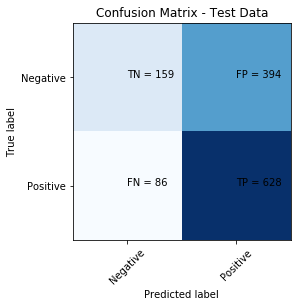

Accuracy: 62.12%
Recall: 87.96%
Precision: 61.45%
F1 Score: 72.35%


In [9]:
predict_model(KNeighborsClassifier(n_neighbors=161), (1,4))

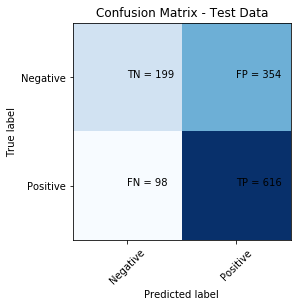

Accuracy: 64.33%
Recall: 86.27%
Precision: 63.51%
F1 Score: 73.16%


In [10]:
predict_model(MultinomialNB(), (2,2))

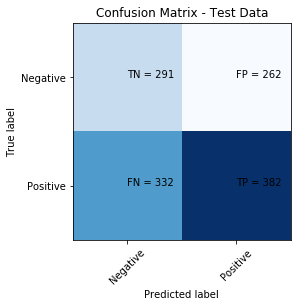

Accuracy: 53.12%
Recall: 53.50%
Precision: 59.32%
F1 Score: 56.26%


In [11]:
predict_model(DecisionTreeClassifier(), (1,4))

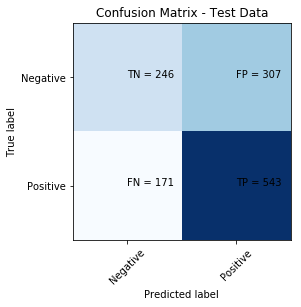

Accuracy: 62.27%
Recall: 76.05%
Precision: 63.88%
F1 Score: 69.44%


In [12]:
predict_model(RandomForestClassifier(n_estimators=200, n_jobs=-1), (1,4))